In [1]:
!pip install scikit-learn

In [2]:
!pip install plotly

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import hamming_loss
import time
import scipy.spatial.distance as sd
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import hamming_loss
import warnings

In [2]:
# bir hücrede birden fazla değeri aynı anda görmek için
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
data = pd.read_csv('customer_booking.csv', encoding='latin1')
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


### Datanın özelliklerinin, değerlerinin gözlemenmesi

In [4]:
# herhangi bir boş değer var mı?
data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
# data tipleri ve diğer özellikler
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
# numerik olmayan kolonlardaki uniq değerlerin kontrolü
data['sales_channel'].unique()
data['trip_type'].unique()
data['flight_day'].unique()
data['route'].unique()
data['booking_origin'].unique()

array(['Internet', 'Mobile'], dtype=object)

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'R\x82union', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanma

In [7]:
# booking_origin sütununda tespit edilen aykırı değerler :  'R\x82union', '(not set)'
# 'R\x82union' değerinin yaptığım araştırmada Fransaya bağlı Hint okyanusunda bulunan denizaşırı bir bölge olan Réunion olduğuna karar verdim.
# 'R\x82union' değerinin Reunion ile değiştirilmesi
data['booking_origin'] = data['booking_origin'].replace('R\x82union','Reunion')

In [8]:
# yapılan değişikliklerin kontrolü
data['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Reunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [9]:
# '(not set)' değerli olan satırların çıkarılması işlemi. 50000 değerden yaklaşık olarak 80 tanesinin çıkarılması veri setini neredeyse 
# hiç etkilemeyeceği için ve daha doğru sonuçlar alabilmek için çıarıldı.
data = data[data['booking_origin'] != '(not set)']
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## Sayısal olmayan sütunların sayısal değerlere çevirilmesi

In [10]:
# sayısal olmayan sütunlar
data.select_dtypes(include = ['object'])

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India
...,...,...,...,...,...
49995,Internet,RoundTrip,Sat,PERPNH,Australia
49996,Internet,RoundTrip,Sun,PERPNH,Australia
49997,Internet,RoundTrip,Sat,PERPNH,Australia
49998,Internet,RoundTrip,Mon,PERPNH,Australia


In [11]:
data.loc[:, 'sales_channel'] = LabelEncoder().fit_transform(data['sales_channel'])
data.loc[:, 'flight_day'] = LabelEncoder().fit_transform(data['sales_channel'])
data.loc[:, 'route'] = LabelEncoder().fit_transform(data['sales_channel'])
data.loc[:, 'booking_origin'] = LabelEncoder().fit_transform(data['sales_channel'])
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,RoundTrip,262,19,7,0,0,0,1,0,0,5.52,0
1,1,0,RoundTrip,112,20,3,0,0,0,0,0,0,5.52,0
2,2,0,RoundTrip,243,22,17,0,0,0,1,1,0,5.52,0
3,1,0,RoundTrip,96,31,4,0,0,0,0,0,1,5.52,0
4,2,0,RoundTrip,68,22,15,0,0,0,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,RoundTrip,27,6,9,0,0,0,1,0,1,5.62,0
49996,1,0,RoundTrip,111,6,4,0,0,0,0,0,0,5.62,0
49997,1,0,RoundTrip,24,6,22,0,0,0,0,0,1,5.62,0
49998,1,0,RoundTrip,15,6,11,0,0,0,1,0,1,5.62,0


In [12]:
data = pd.get_dummies(data, columns=['trip_type'])
data = data.astype(int)
data

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,0,262,19,7,0,0,0,1,0,0,5,0,0,0,1
1,1,0,112,20,3,0,0,0,0,0,0,5,0,0,0,1
2,2,0,243,22,17,0,0,0,1,1,0,5,0,0,0,1
3,1,0,96,31,4,0,0,0,0,0,1,5,0,0,0,1
4,2,0,68,22,15,0,0,0,1,0,1,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,27,6,9,0,0,0,1,0,1,5,0,0,0,1
49996,1,0,111,6,4,0,0,0,0,0,0,5,0,0,0,1
49997,1,0,24,6,22,0,0,0,0,0,1,5,0,0,0,1
49998,1,0,15,6,11,0,0,0,1,0,1,5,0,0,0,1


<Figure size 4000x1600 with 0 Axes>

<Axes: >

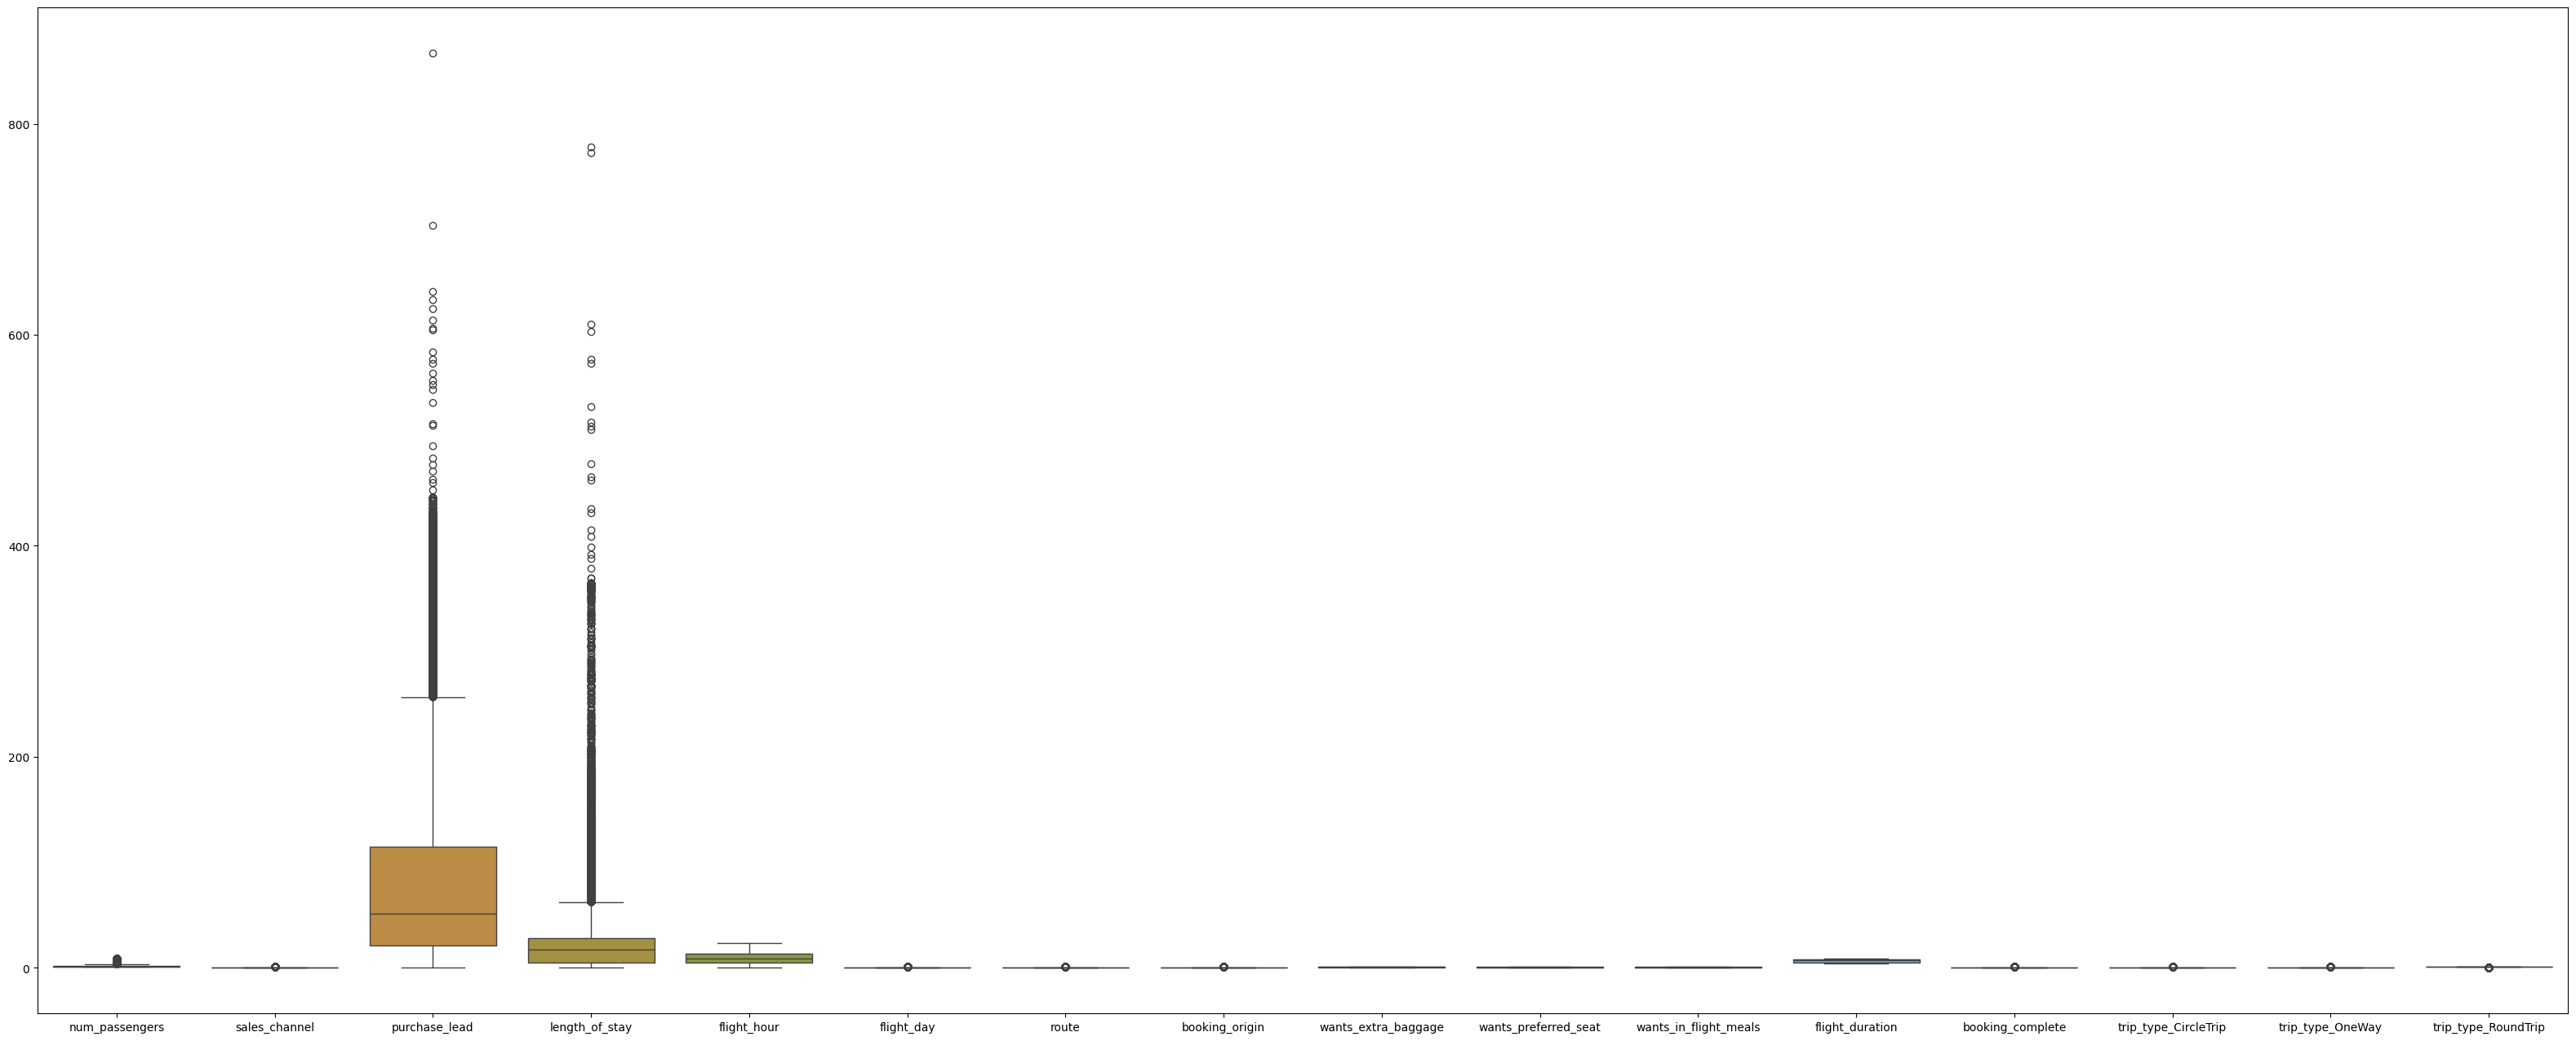

In [13]:
plt.figure(figsize=(40,16))
sns.boxplot(data.astype(int))

In [14]:
data['purchase_lead'].describe()

count    49916.000000
mean        84.948734
std         90.484160
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

<Figure size 2000x9000 with 0 Axes>

<Axes: xlabel='count', ylabel='purchase_lead'>

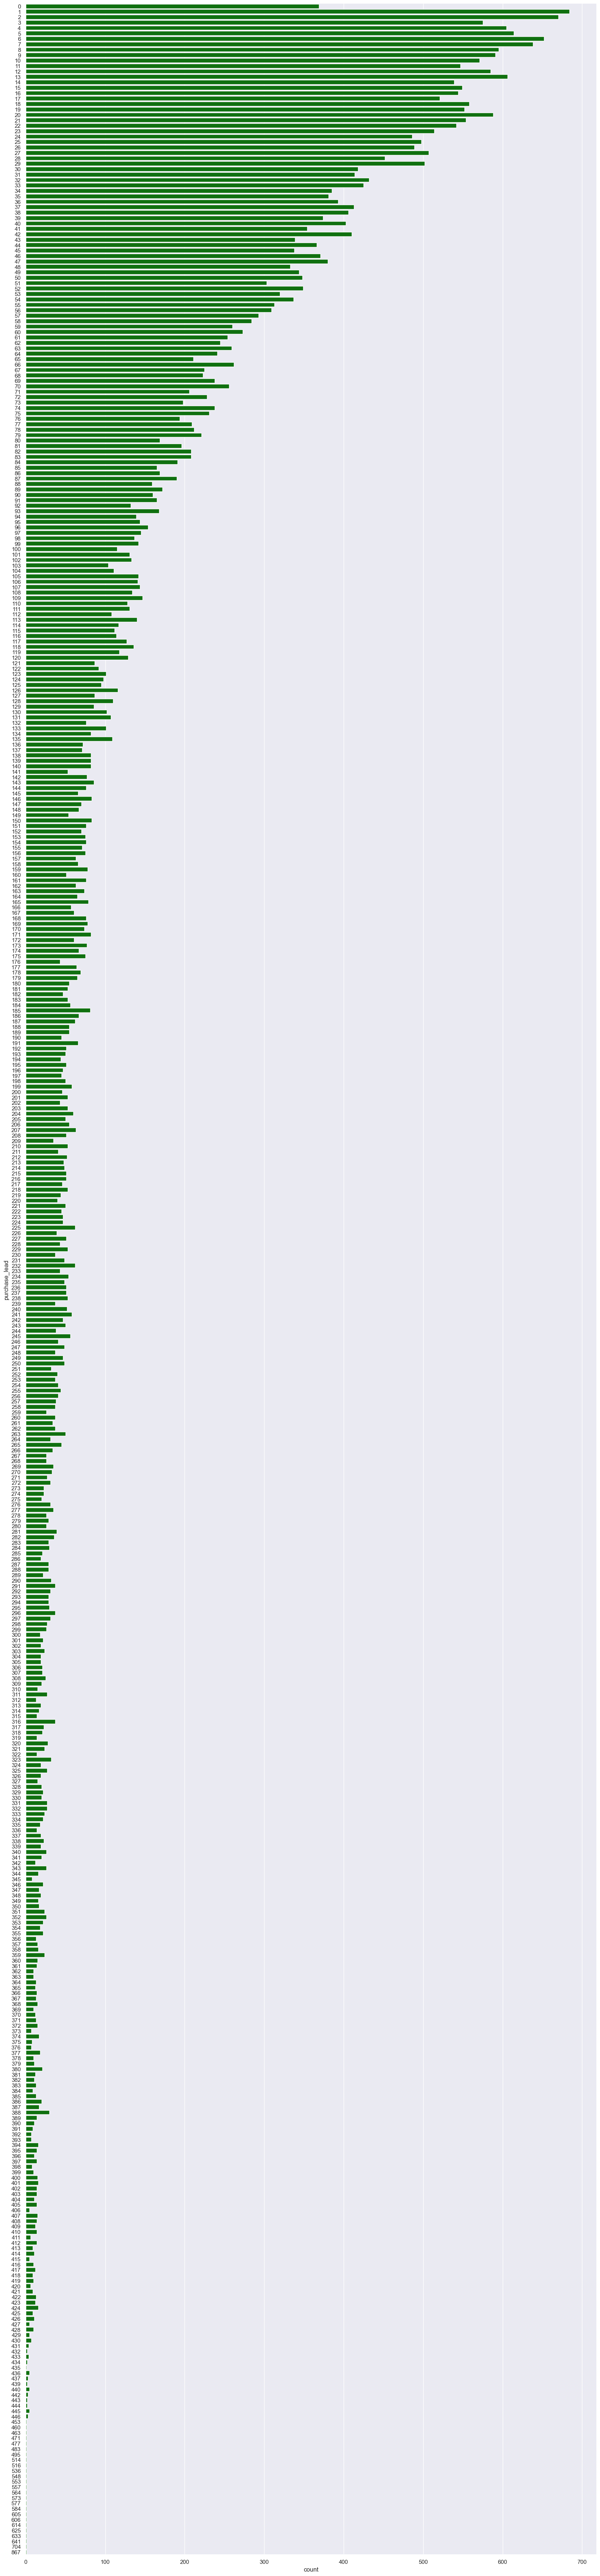

In [15]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,90))
sns.countplot(data, y='purchase_lead', color='green')
plt.show()

In [16]:
data['length_of_stay'].describe()

count    49916.000000
mean        23.054592
std         33.904045
min          0.000000
25%          5.000000
50%         17.000000
75%         28.000000
max        778.000000
Name: length_of_stay, dtype: float64

<Figure size 2000x5000 with 0 Axes>

<Axes: xlabel='count', ylabel='length_of_stay'>

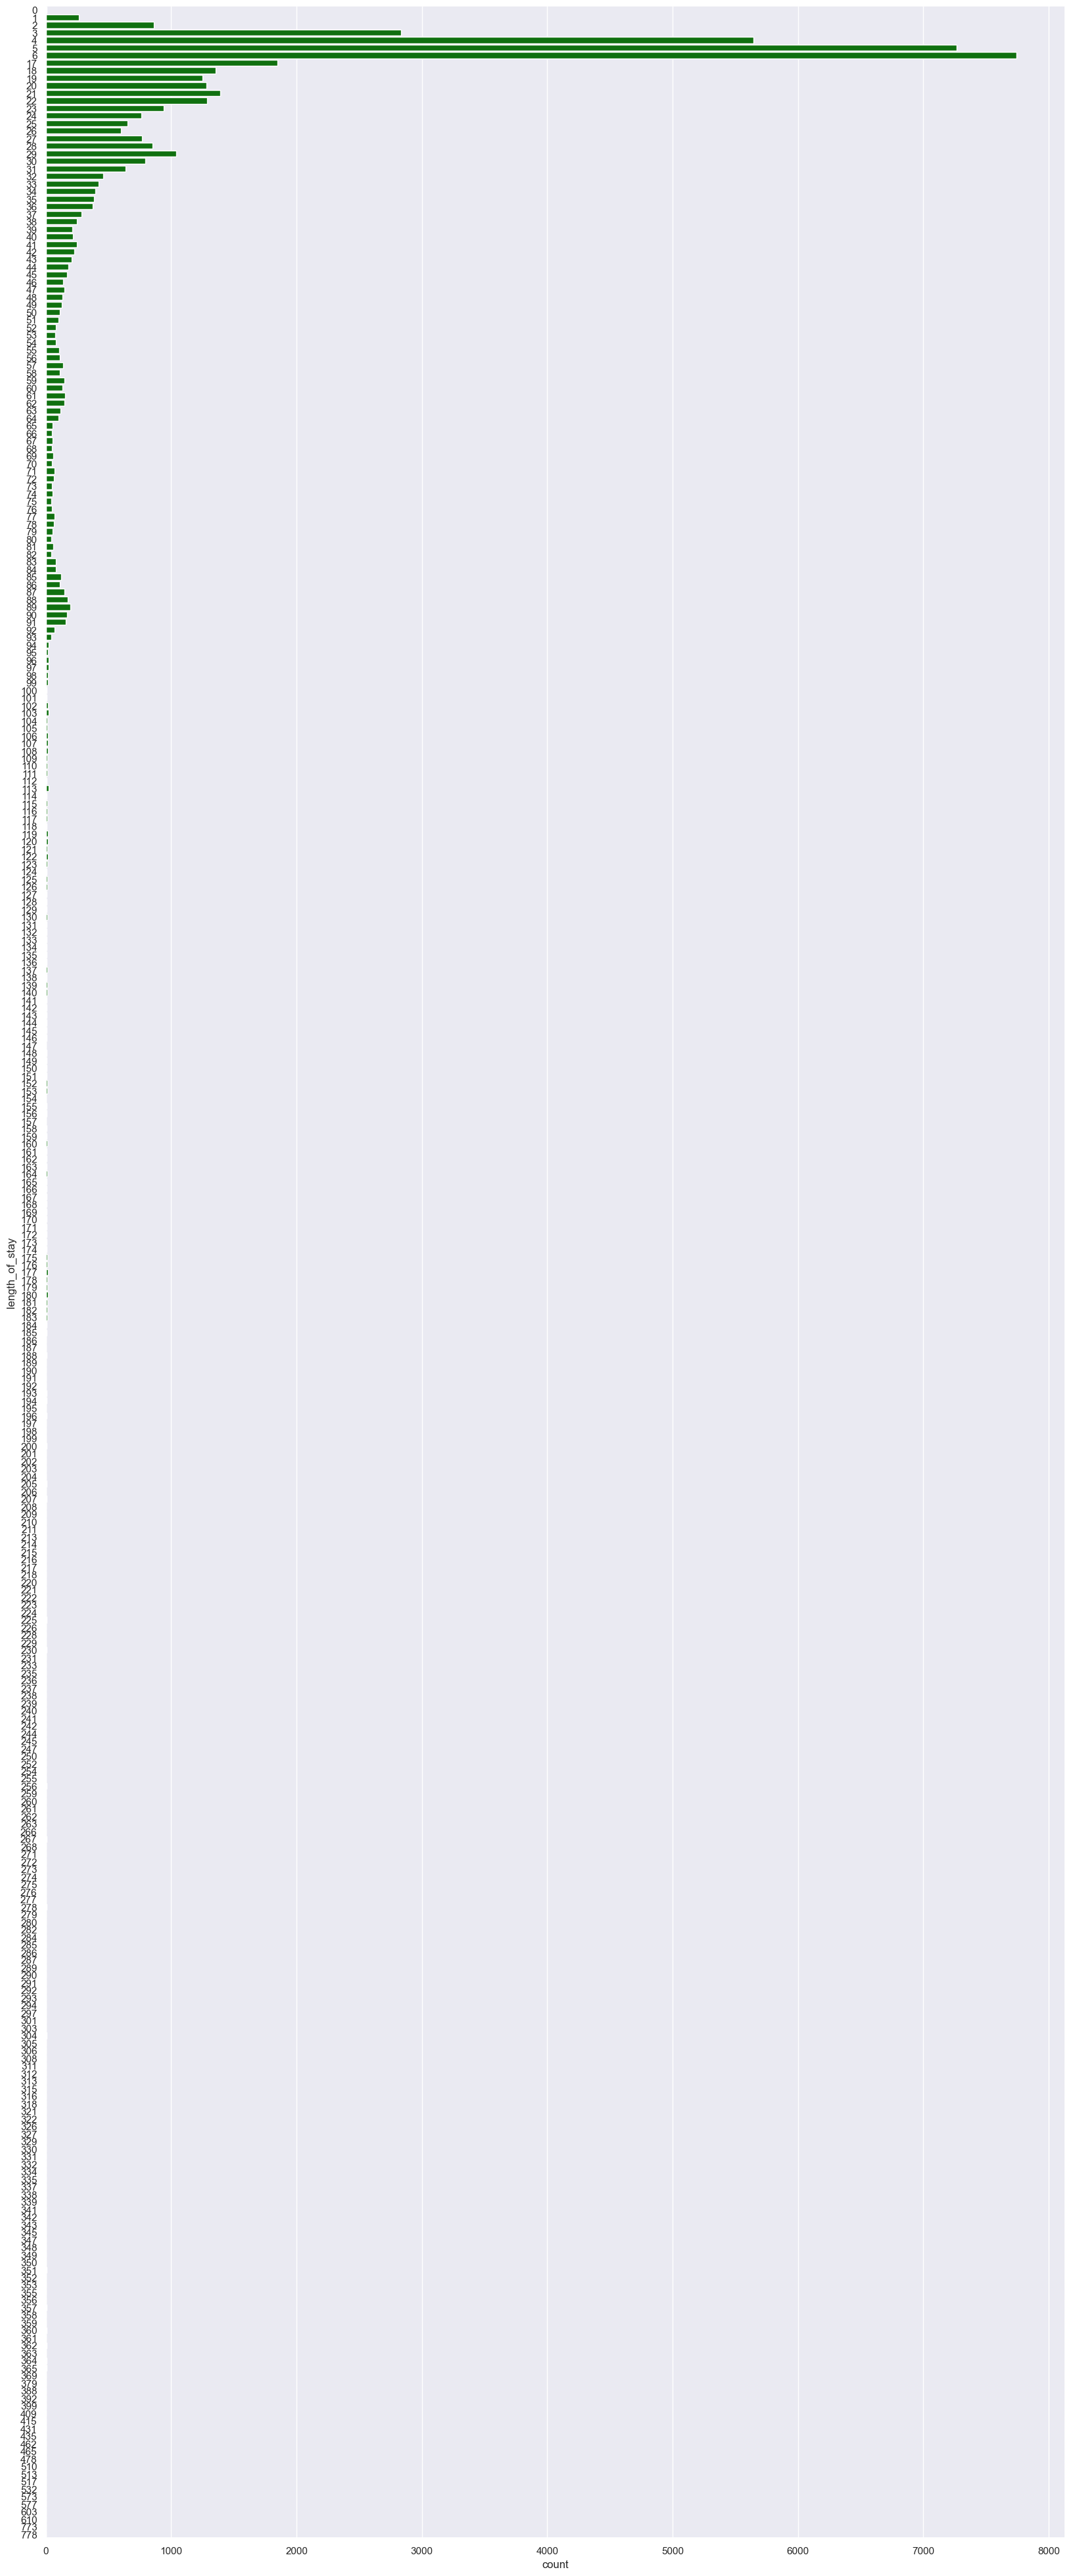

In [17]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,50))
sns.countplot(data,y='length_of_stay',color='green')

In [18]:
# Uyarıları göz ardı et
warnings.filterwarnings("ignore")

# Aykırı Değerlerin Tespiti ve Kaldırılması (length_of_stay ve purchase_lead sütunlarından)
def remove_outliers(df, columns):
    df = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[column] < (Q1 - 1.1 * IQR)) | (df[column] > (Q3 + 2 * IQR)))]
    return df

data_no_outliers = remove_outliers(data, ['length_of_stay', 'purchase_lead'])

In [19]:
# Özellik mühendisliği
def feature_engineering(df):
    df = df.copy()
    df['route_booking_origin'] = df['route'] * df['booking_origin']
    df['flight_hour_day'] = df['flight_hour'] * df['flight_day']
    df['log_purchase_lead'] = np.log(df['purchase_lead'] + 1)
    df['lead_stay_ratio'] = df['purchase_lead'] / (df['length_of_stay'] + 1)
    return df

data_fe = feature_engineering(data)
data_no_outliers_fe = feature_engineering(data_no_outliers)

In [20]:
# Orjinal
X = data.drop(['booking_complete', 'wants_in_flight_meals', 'wants_extra_baggage'], axis=1)
y_booking_complete = data['booking_complete']
y_flight_meals = data['wants_in_flight_meals']
y_extra_baggage = data['wants_extra_baggage']

In [21]:
# Outliers çıkarılmış
X_no_outliers = data_no_outliers.drop(['booking_complete', 'wants_in_flight_meals', 'wants_extra_baggage'], axis=1)
y_booking_complete_no_outliers = data_no_outliers['booking_complete']
y_flight_meals_no_outliers = data_no_outliers['wants_in_flight_meals']
y_extra_baggage_no_outliers = data_no_outliers['wants_extra_baggage']

In [22]:
# Features Engineering yapılmış
X_fe = data_fe.drop(['booking_complete', 'wants_in_flight_meals', 'wants_extra_baggage'], axis=1)
y_booking_complete_fe = data_fe['booking_complete']
y_flight_meals_fe = data_fe['wants_in_flight_meals']
y_extra_baggage_fe = data_fe['wants_extra_baggage']

In [23]:
# Outliers çıkarılmış ve Features Engineering yapılmış
X_no_outliers_fe = data_no_outliers_fe.drop(['booking_complete', 'wants_in_flight_meals', 'wants_extra_baggage'], axis=1)
y_booking_complete_no_outliers_fe = data_no_outliers_fe['booking_complete']
y_flight_meals_no_outliers_fe = data_no_outliers_fe['wants_in_flight_meals']
y_extra_baggage_no_outliers_fe = data_no_outliers_fe['wants_extra_baggage']

In [24]:
# En iyi model ve accuracy değerini saklamak için değişkenler
best_models = {
    'original': {'model': None, 'accuracy': 0},
    'no_outliers': {'model': None, 'accuracy': 0},
    'feature_engineered': {'model': None, 'accuracy': 0},
    'no_outliers_fe': {'model': None, 'accuracy': 0}
}

In [25]:
# Eğitim ve Değerlendirme Fonksiyonu
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    start_test = time.time()
    y_pred = model.predict(X_test)
    end_test = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    h_loss = hamming_loss(y_test, y_pred)

    if len(y_test.shape) == 1:
        hausdorff = sd.directed_hausdorff(y_test.values.reshape(-1, 1), y_pred.reshape(-1, 1))[0]
        ssim_index = ssim(y_test.values, y_pred, data_range=y_pred.max() - y_pred.min())
    else:
        hausdorff = np.mean([sd.directed_hausdorff(y_test.values[:, i].reshape(-1, 1), y_pred[:, i].reshape(-1, 1))[0] for i in range(y_test.shape[1])])
        ssim_index = np.mean([ssim(y_test.values[:, i], y_pred[:, i], data_range=y_pred[:, i].max() - y_pred[:, i].min()) for i in range(y_test.shape[1])])

    train_time = end_train - start_train
    test_time = end_test - start_test

    return accuracy, h_loss, hausdorff, ssim_index, train_time, test_time

In [26]:
# KMeans ve GMM için Eğitim ve Değerlendirme Fonksiyonu
def train_and_evaluate_clustering(model, X_train, X_test, y_train, y_test):
    start_train = time.time()
    model.fit(X_train)
    end_train = time.time()

    start_test = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    end_test = time.time()

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_h_loss = hamming_loss(y_train, y_pred_train)
    test_h_loss = hamming_loss(y_test, y_pred_test)

    return (train_accuracy, train_h_loss, end_train - start_train), (test_accuracy, test_h_loss, end_test - start_test)

In [27]:
# Model Eğitim ve Değerlendirme İşlemleri
def evaluate_models(X, y_booking_complete, y_flight_meals, y_extra_baggage, dataset_name):
    results_booking_complete = {}
    results_flight_meals = {}
    results_extra_baggage = {}

    best_accuracy = 0
    best_model_name = ""

    # Modeller
    models_supervised = {
        'DecisionTree': DecisionTreeClassifier(random_state=10000),
        'LogisticRegression': LogisticRegression(max_iter=70000, random_state=42, n_jobs=-1),
        'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, n_jobs=-1),
    }
    models_unsupervised = {
        'KMeans': KMeans(n_clusters=2, random_state=42),
        'GMM': GaussianMixture(n_components=2, random_state=42)
    }

    if len(np.unique(y_booking_complete)) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y_booking_complete, test_size=0.2, random_state=42, stratify=y_booking_complete)
        print(f"Booking Complete - Eğitim veri sayısı: {len(X_train)}, Test veri sayısı: {len(X_test)}")

        for model_name, model in models_supervised.items():
            accuracy, *metrics = train_and_evaluate(model, X_train, X_test, y_train, y_test)
            results_booking_complete[model_name] = (accuracy, *metrics)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model_name = model_name
        
        for model_name, model in models_unsupervised.items():
            (train_accuracy, *train_metrics), (test_accuracy, *test_metrics) = train_and_evaluate_clustering(model, X_train, X_test, y_train, y_test)
            results_booking_complete[model_name] = (test_accuracy, *test_metrics)
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_model_name = model_name

    # Diğer hedef değişkenler (y_flight_meals ve y_extra_baggage) için benzer işlemler yapılır...
    if len(np.unique(y_flight_meals)) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y_flight_meals, test_size=0.2, random_state=42, stratify=y_flight_meals)
        print(f"Flight Meals - Eğitim veri sayısı: {len(X_train)}, Test veri sayısı: {len(X_test)}")

        for model_name, model in models_supervised.items():
            accuracy, *metrics = train_and_evaluate(model, X_train, X_test, y_train, y_test)
            results_flight_meals[model_name] = (accuracy, *metrics)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model_name = model_name
        
        for model_name, model in models_unsupervised.items():
            (train_accuracy, *train_metrics), (test_accuracy, *test_metrics) = train_and_evaluate_clustering(model, X_train, X_test, y_train, y_test)
            results_flight_meals[model_name] = (test_accuracy, *test_metrics)
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_model_name = model_name

    if len(np.unique(y_extra_baggage)) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y_extra_baggage, test_size=0.2, random_state=42, stratify=y_extra_baggage)
        print(f"Extra Baggage - Eğitim veri sayısı: {len(X_train)}, Test veri sayısı: {len(X_test)}")

        for model_name, model in models_supervised.items():
            accuracy, *metrics = train_and_evaluate(model, X_train, X_test, y_train, y_test)
            results_extra_baggage[model_name] = (accuracy, *metrics)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model_name = model_name
        
        for model_name, model in models_unsupervised.items():
            (train_accuracy, *train_metrics), (test_accuracy, *test_metrics) = train_and_evaluate_clustering(model, X_train, X_test, y_train, y_test)
            results_extra_baggage[model_name] = (test_accuracy, *test_metrics)
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_model_name = model_name

    # En iyi modeli kaydet
    best_models[dataset_name] = {'model': best_model_name, 'accuracy': best_accuracy}

    return results_booking_complete, results_flight_meals, results_extra_baggage

In [28]:
# Fonksiyon çağrıları
results_booking_complete, results_flight_meals, results_extra_baggage = evaluate_models(X, y_booking_complete, y_flight_meals, y_extra_baggage, 'original')
results_booking_complete_no_outliers, results_flight_meals_no_outliers, results_extra_baggage_no_outliers = evaluate_models(X_no_outliers, y_booking_complete_no_outliers, y_flight_meals_no_outliers, y_extra_baggage_no_outliers, 'no_outliers')
results_booking_complete_fe, results_flight_meals_fe, results_extra_baggage_fe = evaluate_models(X_fe, y_booking_complete_fe, y_flight_meals_fe, y_extra_baggage_fe, 'feature_engineered')
results_booking_complete_no_outliers_fe, results_flight_meals_no_outliers_fe, results_extra_baggage_no_outliers_fe = evaluate_models(X_no_outliers_fe, y_booking_complete_no_outliers_fe, y_flight_meals_no_outliers_fe, y_extra_baggage_no_outliers_fe, 'no_outliers_fe')

Booking Complete - Eğitim veri sayısı: 39932, Test veri sayısı: 9984
Flight Meals - Eğitim veri sayısı: 39932, Test veri sayısı: 9984
Extra Baggage - Eğitim veri sayısı: 39932, Test veri sayısı: 9984
Booking Complete - Eğitim veri sayısı: 35991, Test veri sayısı: 8998
Flight Meals - Eğitim veri sayısı: 35991, Test veri sayısı: 8998
Extra Baggage - Eğitim veri sayısı: 35991, Test veri sayısı: 8998
Booking Complete - Eğitim veri sayısı: 39932, Test veri sayısı: 9984
Flight Meals - Eğitim veri sayısı: 39932, Test veri sayısı: 9984
Extra Baggage - Eğitim veri sayısı: 39932, Test veri sayısı: 9984
Booking Complete - Eğitim veri sayısı: 35991, Test veri sayısı: 8998
Flight Meals - Eğitim veri sayısı: 35991, Test veri sayısı: 8998
Extra Baggage - Eğitim veri sayısı: 35991, Test veri sayısı: 8998


In [29]:
# Sonuçların Yazdırılması
def print_results(title, results_booking_complete, results_flight_meals, results_extra_baggage):
    print(title)
    print("Booking Complete Tahmini Sonuçları:")
    for model_name, metrics in results_booking_complete.items():
        if isinstance(metrics[0], tuple):
            print(f"\nModel: {model_name}")
            print(f"Train Accuracy: {metrics[0][0]}, Test Accuracy: {metrics[1][0]}")
            print(f"Train Hamming Loss: {metrics[0][1]}, Test Hamming Loss: {metrics[1][1]}")
            print(f"Train Süresi: {metrics[0][2]}, Test Süresi: {metrics[1][2]}")
        else:
            print(f"\nModel: {model_name}")
            print(f"Accuracy: {metrics[0]}")
            print(f"Hamming Loss: {metrics[1]}")
            print(f"Hausdorff Mesafesi: {metrics[2]}")

    print("\nWants In-Flight Meals Tahmini Sonuçları:")
    for model_name, metrics in results_flight_meals.items():
        if isinstance(metrics[0], tuple):
            print(f"\nModel: {model_name}")
            print(f"Train Accuracy: {metrics[0][0]}, Test Accuracy: {metrics[1][0]}")
            print(f"Train Hamming Loss: {metrics[0][1]}, Test Hamming Loss: {metrics[1][1]}")
            print(f"Train Süresi: {metrics[0][2]}, Test Süresi: {metrics[1][2]}")
        else:
            print(f"\nModel: {model_name}")
            print(f"Accuracy: {metrics[0]}")
            print(f"Hamming Loss: {metrics[1]}")
            print(f"Hausdorff Mesafesi: {metrics[2]}")

    print("\nWants Extra Baggage Tahmini Sonuçları:")
    for model_name, metrics in results_extra_baggage.items():
        if isinstance(metrics[0], tuple):
            print(f"\nModel: {model_name}")
            print(f"Train Accuracy: {metrics[0][0]}, Test Accuracy: {metrics[1][0]}")
            print(f"Train Hamming Loss: {metrics[0][1]}, Test Hamming Loss: {metrics[1][1]}")
            print(f"Train Süresi: {metrics[0][2]}, Test Süresi: {metrics[1][2]}")
        else:
            print(f"\nModel: {model_name}")
            print(f"Accuracy: {metrics[0]}")
            print(f"Hamming Loss: {metrics[1]}")
            print(f"Hausdorff Mesafesi: {metrics[2]}")

# Sonuçların yazdırılması
print_results("Orijinal Veri Seti Sonuçları", results_booking_complete, results_flight_meals, results_extra_baggage)
print_results("Aykırı Değerler Çıkarılmış Veri Seti Sonuçları", results_booking_complete_no_outliers, results_flight_meals_no_outliers, results_extra_baggage_no_outliers)
print_results("Özellik Mühendisliği Uygulanmış Veri Seti Sonuçları", results_booking_complete_fe, results_flight_meals_fe, results_extra_baggage_fe)
print_results("Aykırı Değerler Çıkarılmış ve Özellik Mühendisliği Uygulanmış Veri Seti Sonuçları", results_booking_complete_no_outliers_fe, results_flight_meals_no_outliers_fe, results_extra_baggage_no_outliers_fe)

Orijinal Veri Seti Sonuçları
Booking Complete Tahmini Sonuçları:

Model: DecisionTree
Accuracy: 0.7581129807692307
Hamming Loss: 0.24188701923076922
Hausdorff Mesafesi: 0.0

Model: LogisticRegression
Accuracy: 0.8504607371794872
Hamming Loss: 0.14953926282051283
Hausdorff Mesafesi: 1.0

Model: RandomForest
Accuracy: 0.8502604166666666
Hamming Loss: 0.14973958333333334
Hausdorff Mesafesi: 0.0

Model: KMeans
Accuracy: 0.7073317307692307
Hamming Loss: 0.2926682692307692
Hausdorff Mesafesi: 0.013534069061279297

Model: GMM
Accuracy: 0.8386418269230769
Hamming Loss: 0.16135817307692307
Hausdorff Mesafesi: 0.0189974308013916

Wants In-Flight Meals Tahmini Sonuçları:

Model: DecisionTree
Accuracy: 0.5908453525641025
Hamming Loss: 0.4091546474358974
Hausdorff Mesafesi: 0.0

Model: LogisticRegression
Accuracy: 0.6736778846153846
Hamming Loss: 0.32632211538461536
Hausdorff Mesafesi: 0.0

Model: RandomForest
Accuracy: 0.6785857371794872
Hamming Loss: 0.32141426282051283
Hausdorff Mesafesi: 0.0

M

In [30]:
# En iyi modelleri ve accuracy değerlerini yazdır
print("\nEn İyi Modeller ve Accuracy Değerleri:")
for dataset_name, model_info in best_models.items():
    print(f"{dataset_name} veri seti: {model_info['model']} modeli ile accuracy: {model_info['accuracy']}")


En İyi Modeller ve Accuracy Değerleri:
original veri seti: LogisticRegression modeli ile accuracy: 0.8504607371794872
no_outliers veri seti: RandomForest modeli ile accuracy: 0.8497443876416981
feature_engineered veri seti: LogisticRegression modeli ile accuracy: 0.8504607371794872
no_outliers_fe veri seti: RandomForest modeli ile accuracy: 0.8497443876416981
